# Signal To Features (Feature Extraction & Feature Selection)

**Complex Signal To Data(Features)**

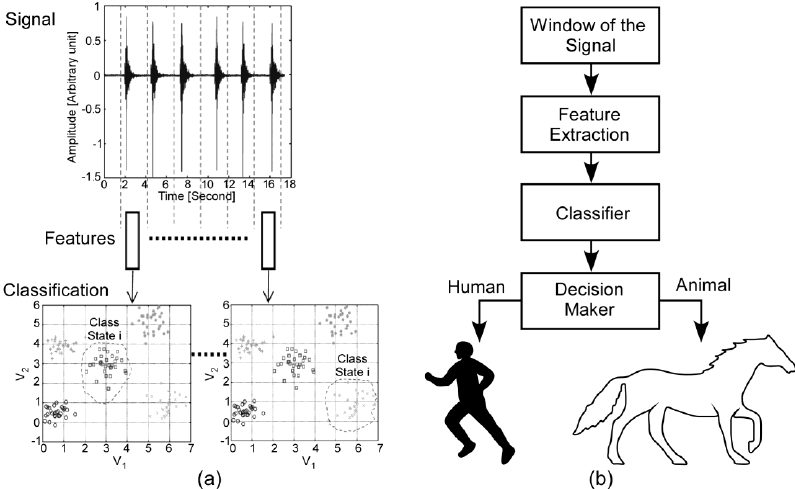

**Fourier transform (FT)** is a transform that converts a function into a form that describes the frequencies present in the original function.

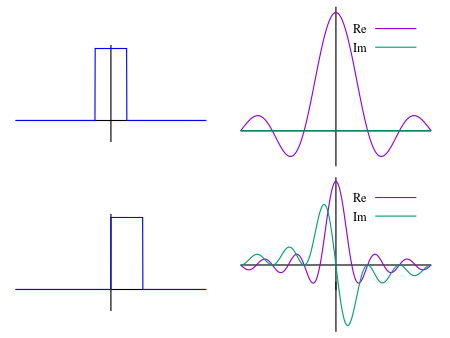

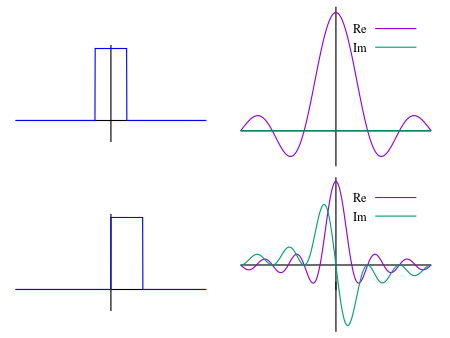

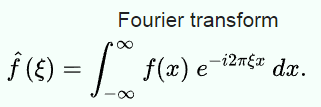

In mathematics, the **discrete-time Fourier transform** (**DTFT**), also called the finite Fourier transform, is a form of Fourier analysis that is applicable to a sequence of values.

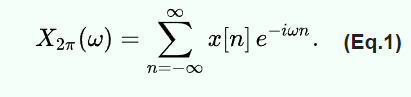

In mathematics, the **discrete Fourier transform** (DFT) converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency.

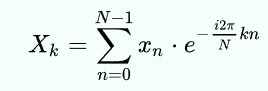

A **Fast** **Fourier transform** (**FFT**) is an algorithm that computes the discrete Fourier transform (DFT) of a sequence

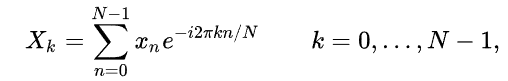

A **Spectrogram** is a visual representation of the spectrum of frequencies of a signal as it varies with time.

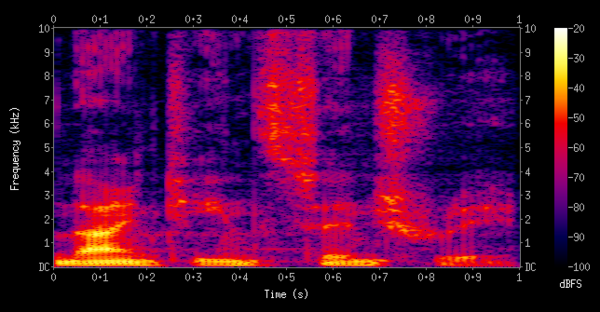

# Create Spectrogram

1. Divide the signal into equal-length segments. The segments must be short enough that the frequency content of the signal does not change appreciably within a segment. The segments may or may not overlap.

2. Window each segment and compute its spectrum to get the **short-time** **Fourier** **transform**.

3. Display segment-by-segment the power of each spectrum in decibels. Depict the magnitudes side-by-side as an image with magnitude-dependent colormap.

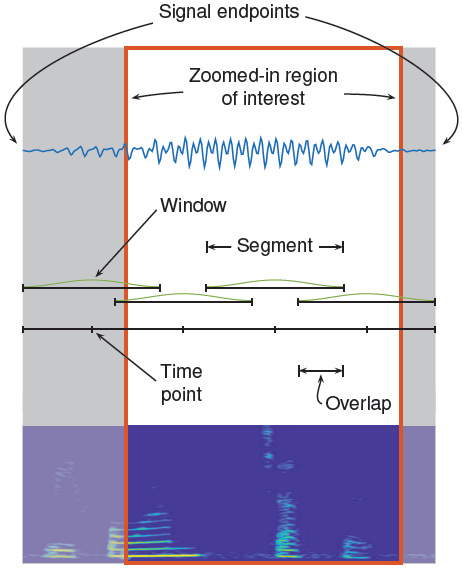

The **short-time** **Fourier** **transform** (**STFT**), is a Fourier-related transform used to determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time.

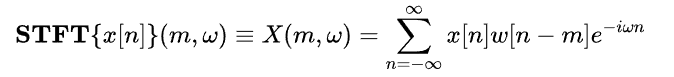

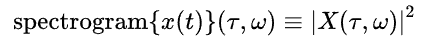

In sound processing, the **mel-frequency cepstrum** (**MFC**) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

**Mel-frequency cepstral coefficients (MFCCs)** are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). 

## **Generate MFCC**

1. Take the Fourier transform of (a windowed excerpt of) a signal.
2. Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows or alternatively, cosine overlapping windows.
3. Take the logs of the powers at each of the mel frequencies.
4. Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
5. The MFCCs are the amplitudes of the resulting spectrum.

In [3]:
from IPython.display import Audio, display
import wave
import numpy as np

In [7]:
display(Audio('test.wav'))

In [8]:
obj = wave.open('test.wav','rb')

In [9]:
frames = obj.readframes(-1)

In [10]:
signal_array = np.frombuffer(frames,dtype=np.int16)

In [11]:
len(signal_array)

617400

In [12]:
len(signal_array)/7

88200.0

In [13]:
hoosh = signal_array[int((int(len(signal_array)/7))*2.3):int((int(len(signal_array)/7))*3.1)]

In [14]:
new_obj6 = wave.open('hoosh.wav','wb')
new_obj6.setframerate(44100)
new_obj6.setsampwidth(2)
new_obj6.setnchannels(2)
new_obj6.writeframes(hoosh.tobytes())
new_obj6.close()

In [15]:
display(Audio('hoosh.wav'))

In [16]:
!pip uninstall librosa # 0.9.0
!pip install librosa==0.8.0

Found existing installation: librosa 0.10.0.post2
Uninstalling librosa-0.10.0.post2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/librosa-0.10.0.post2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/librosa/*
Proceed (Y/n)? y
  Successfully uninstalled librosa-0.10.0.post2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.6 MB/s eta 0:00:00
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201393 sha256=fca7d6d2f115b5cb8a3f88831d886627937f48deec9405eddbf0cacc158bfb31
  Stored in directory: /root/.cache/pip/wheels/bf/b7/85/2f8044306ccec014930aea23ad4852fca9e2584e21c6972bc6
Successfully built librosa


In [17]:
import librosa, librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

In [18]:
signal, sr = librosa.load('hoosh.wav', sr=44100)

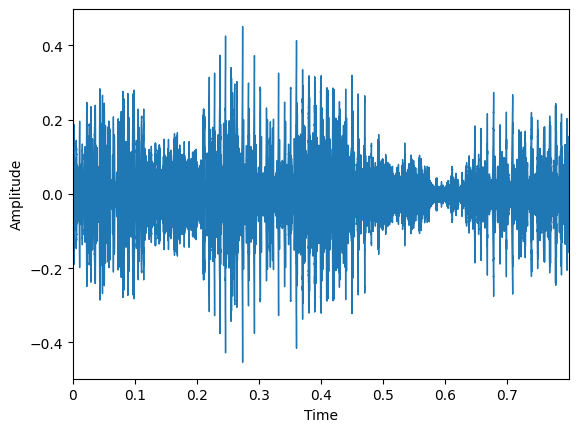

In [19]:
# librosa.display.waveshow(signal, sr = sr)
librosa.display.waveplot(signal, sr = sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [20]:
n_fft = 2048
hop_length = 512 # How much we have to shift
stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)

log_spectrogram  = librosa.amplitude_to_db(spectrogram)

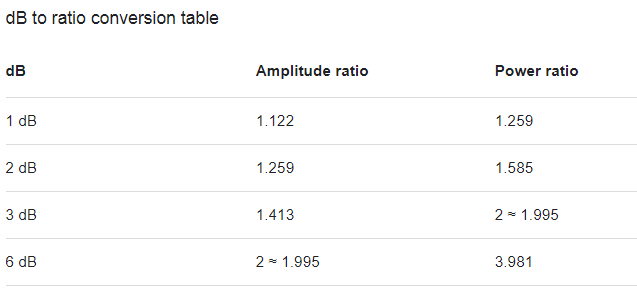

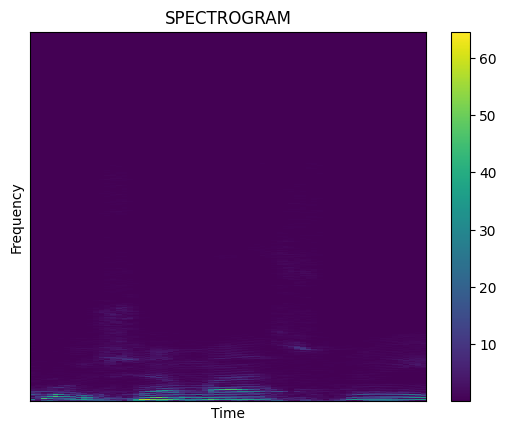

In [21]:
# SPECTROGRAM
librosa.display.specshow(spectrogram, sr = sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("viridis")
plt.title('SPECTROGRAM')
plt.show()

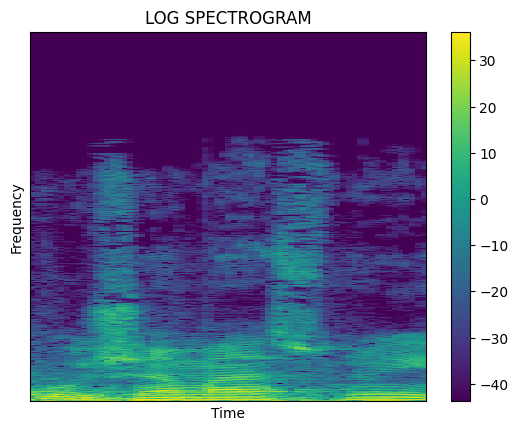

In [22]:
# LOG SPECTROGRAM
librosa.display.specshow(log_spectrogram, sr = sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.set_cmap("viridis")
plt.colorbar()
plt.title('LOG SPECTROGRAM')
plt.show()

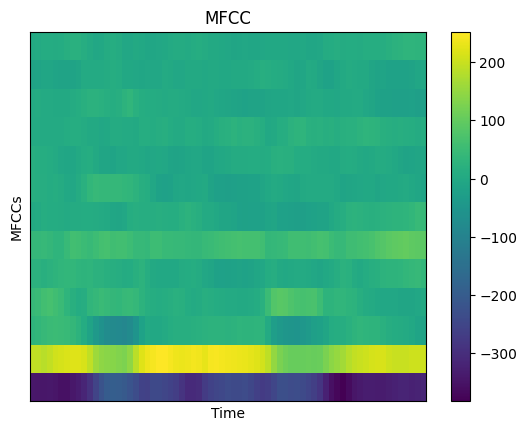

In [23]:
#MFCCs
MFCCs = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13)
librosa.display.specshow(MFCCs, sr = sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("MFCCs")
plt.set_cmap("viridis")
plt.title('MFCC')
plt.colorbar()
plt.show()

In [24]:
spectrogram

array([[1.0964104e+01, 1.2548919e+01, 4.3708107e-01, ..., 6.7684836e+00,
        4.5142803e+00, 7.2206540e+00],
       [3.6564114e+00, 7.9565511e+00, 1.5980395e+01, ..., 9.7252216e+00,
        5.7103858e+00, 3.1406274e+00],
       [6.7267284e+00, 2.8948438e+00, 1.5272521e+01, ..., 5.7925563e+00,
        2.1918626e+00, 2.5763698e+00],
       ...,
       [3.6083888e-03, 1.8274670e-03, 1.0527653e-04, ..., 8.6743414e-05,
        3.7803973e-05, 4.3897130e-04],
       [3.5854257e-03, 1.8334051e-03, 6.7456509e-05, ..., 1.8692644e-04,
        1.4025108e-04, 5.6835782e-04],
       [3.5054986e-03, 1.6777616e-03, 9.6358890e-05, ..., 2.1495954e-04,
        1.5598827e-04, 4.9479160e-04]], dtype=float32)

In [25]:
spectrogram.shape

(1025, 69)

In [26]:
log_spectrogram.shape

(1025, 69)

In [28]:
log_spectrogram.max()

36.19528

In [29]:
log_spectrogram.min()

-43.80472

In [30]:
spectrogram.max()

64.53034

In [31]:
spectrogram.min()

3.9766775e-08

In [32]:
MFCCs.shape

(13, 69)

In [33]:
MFCCs.max()

251.96802

In [34]:
MFCCs.min()

-382.60916

In [35]:
MFCCs.shape

(13, 69)

In [36]:
spectrogram.shape

(1025, 69)

In [37]:
signal.shape

(35280,)

In [38]:
spectrogram.shape[0]*spectrogram.shape[1]

70725

In [40]:
signal.shape[0]/(spectrogram.shape[0]*spectrogram.shape[1])

0.49883351007423116

In [41]:
signal.shape[0]/(MFCCs.shape[0]*MFCCs.shape[1])

39.331103678929765